### Lab5 Clustering Techniques Using DBSCAN and Hierarchical Clustering

### Step 1: Data Preparation and Exploration

Libraries needed to handle data, visualization, and clustering were imported. Due to the dataset Wine, the sklearn was loaded, and set up with the purpose to analyze it. The features got normalized in order to enhance the accuracy of clustering and PCA dimension reduction enabled easy visualization of the data in two dimensions.

In [24]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing tools for clustering and evaluation
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

The Wine data has been loaded and converted into a pandas DataFrame with names of the features. It was possible to see five first rows to get acquainted with the sample records. The structure and summary statistics were verified to determine types of data, values that were missing and distributions of values.


In [26]:


# Loading the Wine dataset from sklearn
wine = load_wine()

# Converting the dataset into a pandas DataFrame
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Displaying the first five rows of the dataset
data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:

# Checking the structure of the dataset
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [28]:
# Showing the summary statistics of the dataset
data.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The feature values were converted into a common scale to make sure that the variables were of the same scale. The data was simplified by dividing dimensionality to 2 components through the PCA. The data were reduced and put in a form that would allow visual representation of cluster results as a two-dimensional plot.

In [30]:

# Standardizing the features to make all values comparable
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Reducing the data to 2 components using PCA for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

### Step 2: Hierarchical Clustering

####  Applying Agglomerative Hierarchical Clustering to the Dataset


The data was clustered into 3 clusters through agglomerative clustering on Ward linkage. The Euclidean method was used in assessing the distance between the data points. The standardized data were fitted with the model and cluster labels were generated.


In [32]:
from sklearn.cluster import AgglomerativeClustering

# Creating the clustering model using the updated syntax
hc_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fitting the model and predicting labels
labels_hc = hc_model.fit_predict(scaled_data)


#### Testing Different Values for n_clusters


Cluster values ranging between two and five were checked using Ward linkage. The data was reduced and projected on two dimensions, using which the clusters were plotted and visualized. Every plot was used to demonstrate the way the wine samples identified various clusters according to the chosen number of clusters.

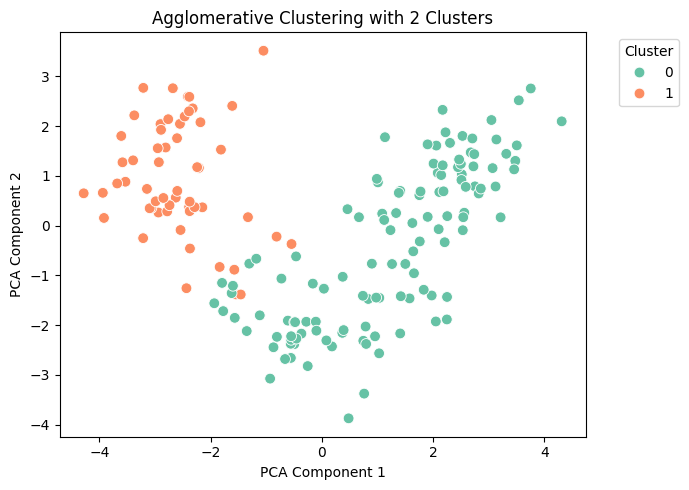

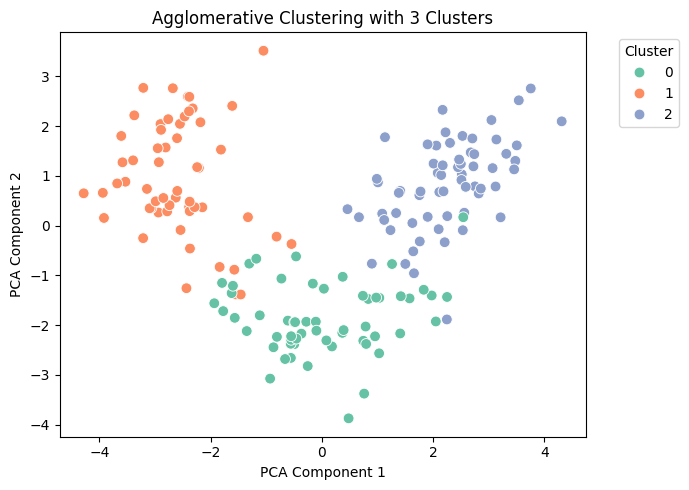

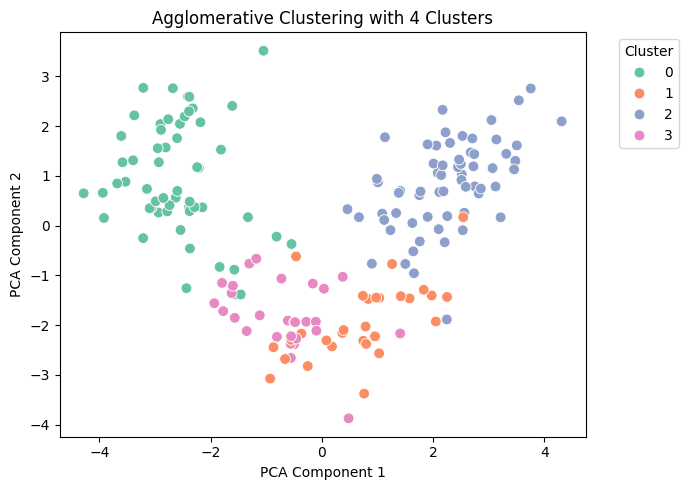

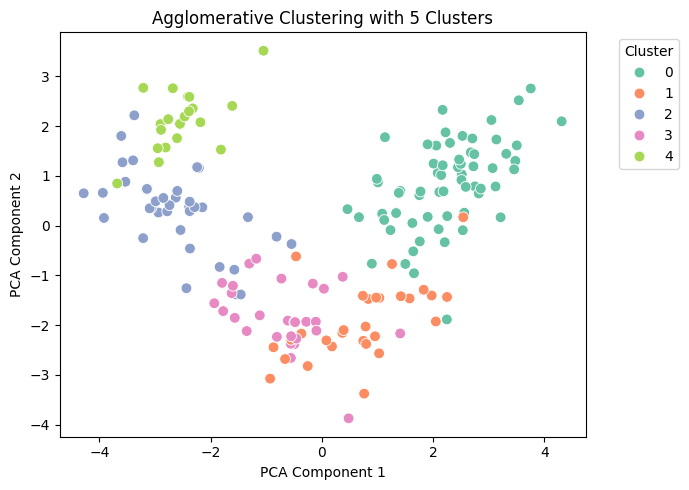

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Trying different values for number of clusters
for n in [2, 3, 4, 5]:
    # Creating model without affinity/metric
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    # Fitting model and predicting labels
    labels = model.fit_predict(scaled_data)

    # Plotting the clusters using PCA-reduced data
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set2', s=60)
    plt.title(f"Agglomerative Clustering with {n} Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


According to the visualizations of Agglomerative Clustering using the 2, 3, 4, and 5 clusters, the maximum quality of the clusters is obtained when using 5 clusters. In the case of 2 clusters, data is roughly divided into two categories that lack internal structure. In 3 clusters, the segmentation is more understandable, with the distinctive cluster on the right. With 4 clusters, this model obtains further variability, dividing the overlapping areas into more specific categories. Lastly, 5 clusters presents an even higher level of distinctness, showing subgroups but a little bit overlapped, and it can imply a little overfitting. All in all, more clusters reveal more structure, but can support less generalization when oversaturated.









#### Generating and Interpreting a Dendrogram to Understand the Hierarchical Structure

A linkage matrix was generated with Ward method to quantify the merging samples across clusters. A tree of dendrograms was created so as to understand the way clusters are merged and the distance between different clusters. The number of clusters was identified by viewing the sections with large vertical gaps with the help of the plot.

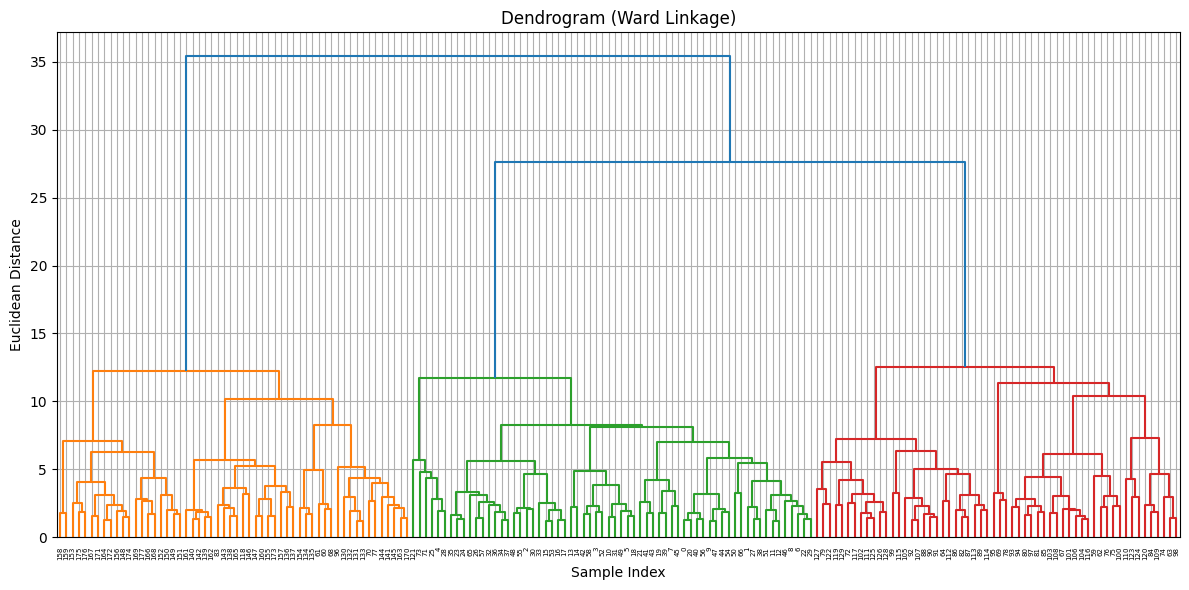

In [37]:
# Importing SciPy for creating a dendrogram
import scipy.cluster.hierarchy as sch

# Creating the linkage matrix using Ward’s method
linkage_matrix = sch.linkage(scaled_data, method='ward')

# Plotting the dendrogram to show how samples merge into clusters
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


Agglomerative and reduced data (through PCA) were used to perform agglomeration with various cluster numbers. Using 2 clusters resulted in a division of the data into 2 big pieces but some data was omitted. Under 3 clusters, the groups were more apparent and well distinguished. Incorporating 4 and 5 clusters revealed more small groups as well as some mixing. The dendrogram had three large gaps implying that 3 clusters present a clear and balanced method of organizing data. Therefore, 3 clusters provides a decent outcome that has intuitive structure.

### Step 3: DBSCAN Clustering

#### Experimenting with Different Values for eps and min_samples



Different values for eps and min_samples were selected to test how DBSCAN forms clusters. The neighborhood values of the eps values were used to set the nearest distance of points. The min_samples values defined how many nearby points were needed to form a dense region.


In [40]:
# Defining combinations of eps and min_samples to try
eps_values = [1.5, 2.0, 2.5]
min_samples_values = [3, 5, 7]


#### Displaying Visualizations of the Resulting Clusters and Highlighting Noise Points


Each combination of eps and min_samples was tested to observe how clusters formed in the data. Labeled clusters were obtained and the cluster counts/noise points were recorded in each case. Scatter plots were then used to present results in terms of the shape and separation of clusters.


--- DBSCAN with eps=1.5, min_samples=3 ---
Clusters found (excluding noise): 8
Noise points detected: 147


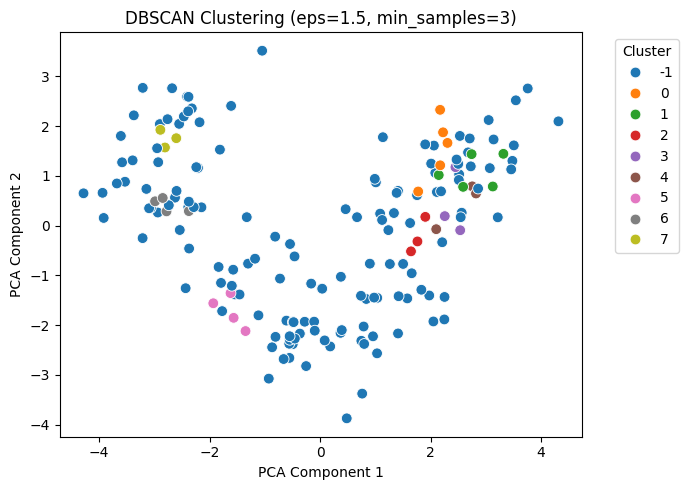


--- DBSCAN with eps=1.5, min_samples=5 ---
Clusters found (excluding noise): 0
Noise points detected: 178


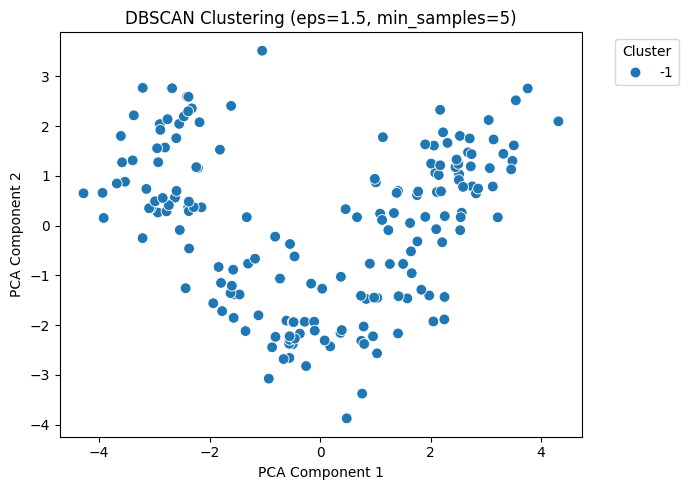


--- DBSCAN with eps=1.5, min_samples=7 ---
Clusters found (excluding noise): 0
Noise points detected: 178


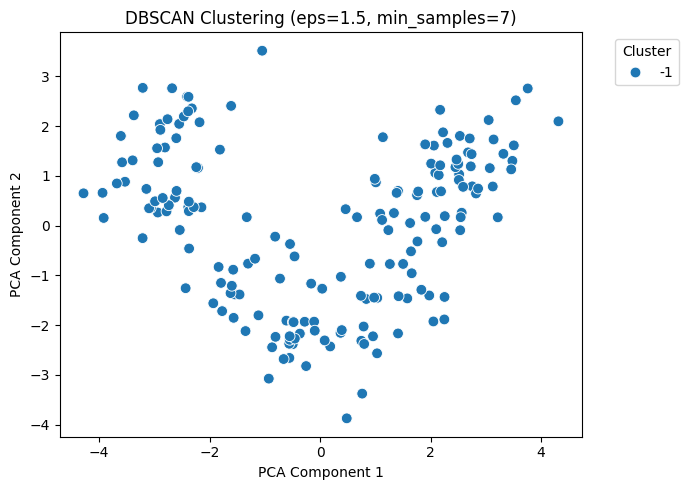


--- DBSCAN with eps=2.0, min_samples=3 ---
Clusters found (excluding noise): 5
Noise points detected: 64


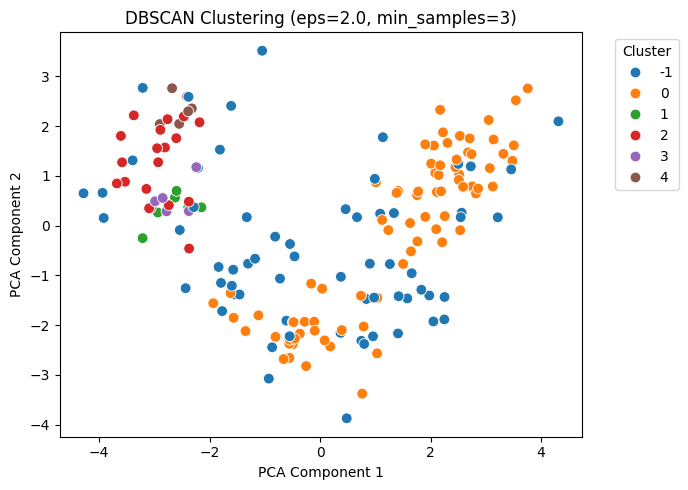


--- DBSCAN with eps=2.0, min_samples=5 ---
Clusters found (excluding noise): 5
Noise points detected: 85


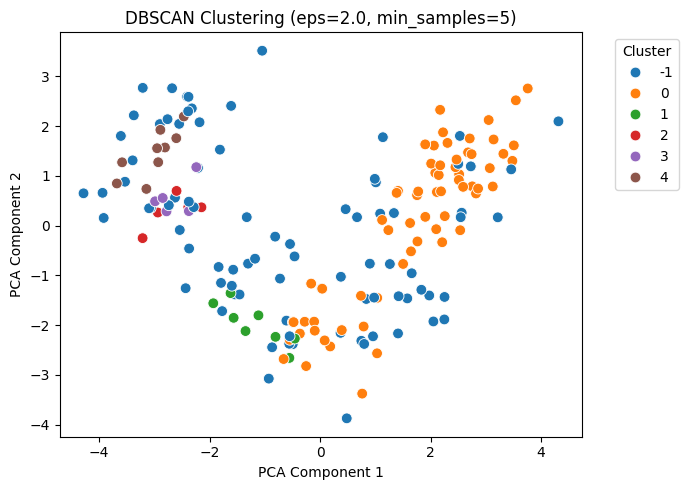


--- DBSCAN with eps=2.0, min_samples=7 ---
Clusters found (excluding noise): 3
Noise points detected: 110


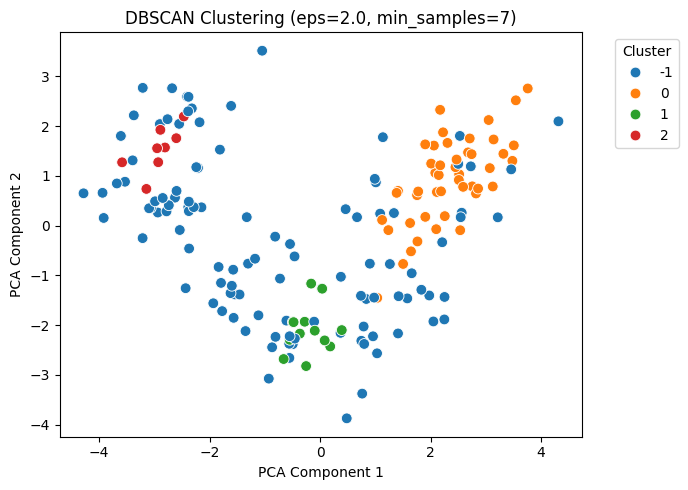


--- DBSCAN with eps=2.5, min_samples=3 ---
Clusters found (excluding noise): 1
Noise points detected: 23


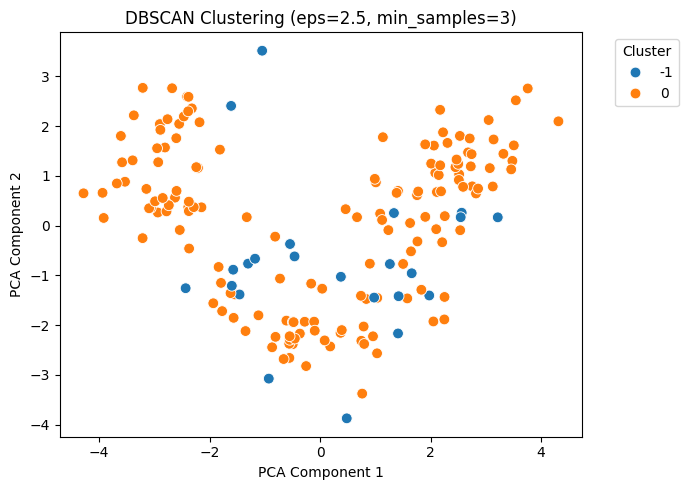


--- DBSCAN with eps=2.5, min_samples=5 ---
Clusters found (excluding noise): 1
Noise points detected: 24


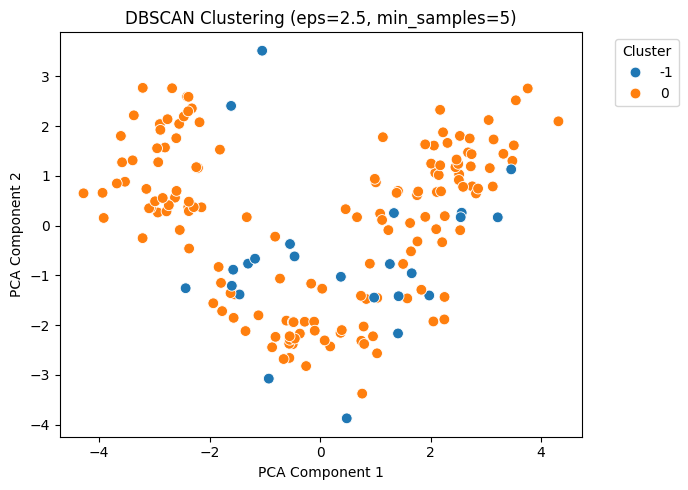


--- DBSCAN with eps=2.5, min_samples=7 ---
Clusters found (excluding noise): 1
Noise points detected: 29


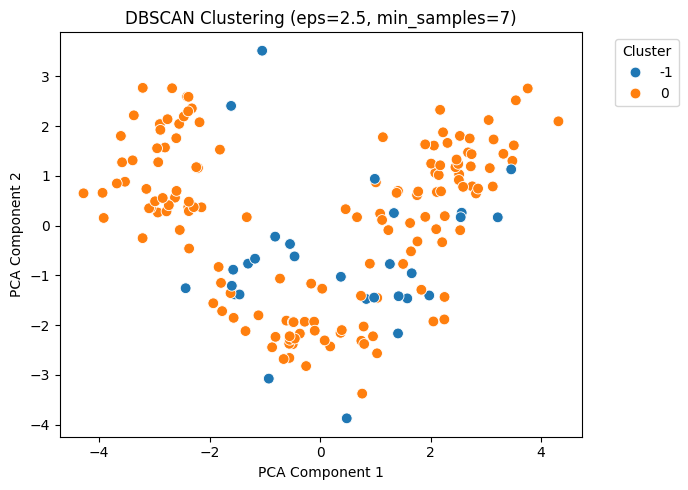

In [42]:
from sklearn.cluster import DBSCAN
# Looping through each eps and min_samples combination
for eps in eps_values:
    for min_samples in min_samples_values:
        # Creating a DBSCAN model with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Fitting the model and getting cluster labels
        labels = dbscan.fit_predict(scaled_data)

        # Counting the number of clusters (excluding noise label -1)
        unique_labels = set(labels)
        n_clusters = len([label for label in unique_labels if label != -1])
        n_noise = list(labels).count(-1)

        # Printing the current DBSCAN settings
        print(f"\n--- DBSCAN with eps={eps}, min_samples={min_samples} ---")
        print(f"Clusters found (excluding noise): {n_clusters}")
        print(f"Noise points detected: {n_noise}")

        # Plotting the clusters using reduced PCA data
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="tab10", s=60)
        plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


DBSCAN clustering was tested using different values for eps and min_samples to see how well it grouped the wine data and detected noise. At eps 1.5, there were poor results. Almost all points were marked as noise when min_samples was set to 5 or 7. Even when using min_samples = 3, the model found several clusters, but a large number of points were still marked as noise. This indicated that eps = 1.5 was inadequately small in this set of data.

A higher value of eps of 2.0 showed better clustering outcomes. With min_samples = 3 or 5, the model found five clusters with a manageable amount of noise, which gave a better balance. However, increasing min_samples to 7 caused the number of clusters to drop to three, and more points were seen as noise. At eps = 2.5, DBSCAN grouped most points into just one large cluster, no matter the min_samples value. It indicated that an eps that is too large may cluster very many points into a single cluster and compromise the quality of the results. Overall, the best clustering was seen when eps = 2.0 and min_samples = 3, as this setting gave a good number of clusters with low noise.










### Step 4:  Density and Clustering Analysis and Comparison

Hierarchical Clustering and DBSCAN was used in this lab to cluster the dataset and find structure in the data. Principal Component Analysis was performed to make easier visualization of reduced data to two dimension. Clustering Hierarchy was used under 2 to 5 clusters. Two clusters caused the data to be generalized in terms of specifics. The 3 cluster provided a clearer structure on separation of groups. Then, in 4 and 5 clusters more concrete groups were found with some overlapping. The dendrogram indicated 3 large separations indicating that a natural grouping of 3 clusters existed. All points of data were grouped in this method, and this approach is applicable whereby there is a need to place each of the items in a cluster.

DBSCAN was tested with different values for eps and min_samples to see how groupings changed. At eps value 1.5, very few clusters were found and many data points were treated as noise, especially with min_samples 5 or 7. At eps value 2.0 and min_samples 3, five clear clusters were found with fewer noise points, giving the best result. By setting eps to 2.5 most of the data points were concentrated in a single cluster making the results less informative. DBSCAN was effective in discovering natural patterns and isolating outliers though quality adjustment of parameters was necessary. The Hierarchical Clustering provided complete groupings with rigid forms, and the DBSCAN provided flexibility and enabled the dispersion of data better.

